In [1]:
## A notebook to showcase the Quaternion Fourier Transform
import quaternion
from quaternion_symplectic import qfft, iqfft, load_image, get_modulus_phase_axis
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
np.set_printoptions(precision=2, suppress=True)  # for compact output

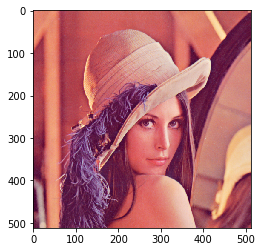

In [2]:
# Load an image
lenna = np.array(Image.open('fixtures/lenna.png'))
plt.imshow(lenna)
plt.show()

In [3]:
# Load as quaternionic matrix
q = load_image(lenna)
print(q.shape)
print(q[10:15, 10:15])

(512, 512)
[[quaternion(0, 226, 131, 113) quaternion(0, 228, 129, 105)
  quaternion(0, 225, 134, 115) quaternion(0, 224, 127, 106)
  quaternion(0, 226, 132, 113)]
 [quaternion(0, 225, 133, 105) quaternion(0, 226, 132, 104)
  quaternion(0, 225, 131, 105) quaternion(0, 227, 128, 106)
  quaternion(0, 227, 130, 110)]
 [quaternion(0, 225, 133, 111) quaternion(0, 226, 129, 108)
  quaternion(0, 228, 129, 105) quaternion(0, 226, 126, 102)
  quaternion(0, 226, 129, 114)]
 [quaternion(0, 226, 127, 105) quaternion(0, 226, 135, 100)
  quaternion(0, 225, 130, 109) quaternion(0, 226, 129, 101)
  quaternion(0, 226, 127, 100)]
 [quaternion(0, 228, 123, 96) quaternion(0, 226, 133, 112)
  quaternion(0, 229, 129, 109) quaternion(0, 225, 131, 108)
  quaternion(0, 228, 129, 105)]]


<class 'numpy.ndarray'>


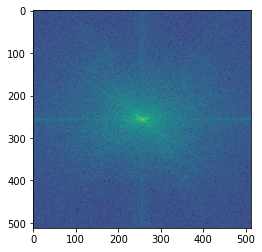

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


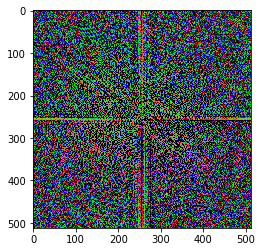

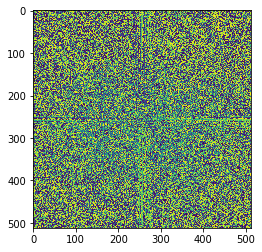

In [5]:
# Do the qfft
Q = qfft(q)
print(type(Q))
Qmag, Qphase, Qaxis = get_modulus_phase_axis(Q)
plt.imshow(1 + np.log(Qmag))
plt.show()
plt.imshow(Qphase)
plt.show()
plt.imshow(Qaxis)
plt.show()

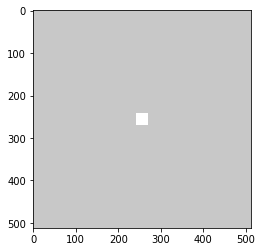

In [41]:
# We'll create a simple low-pass filter.
# This filter is known as ideal low-pass filter (ILPF):
H = np.zeros_like(Q_float)
spectrum_center = [x // 2 for x in lenna.shape]
platos = 15
H[spectrum_center[0]-platos:spectrum_center[0]+platos,spectrum_center[1]-platos:spectrum_center[1]+platos, 0] = 1.
H[:, :, 1] = H[:, :, 0]
H[:, :, 2] = H[:, :, 0]
H[:, :, 3] = H[:, :, 0]
H = 1. - H
plt.imshow(np.log(1+np.abs(H)), cmap="gray")
plt.show()

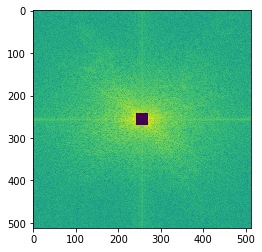

In [42]:
# Filtering is then simply a point-to-point multiplication
Q_filtered = Q_float * H
Qfiltered_mag = np.sqrt(Q_filtered[:, :, 0]**2 + Q_filtered[:, :, 1]**2 + Q_filtered[:, :, 2]**2 + Q_filtered[:, :, 3]**2)
plt.imshow(np.log(1+Qfiltered_mag))
plt.show()

0


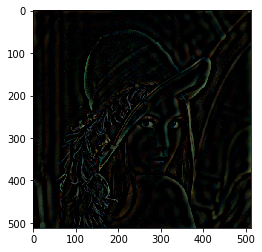

In [43]:
A_filtered = quaternion.as_quat_array(Q_filtered)
A = iqfft(A_filtered)
#print(A)
A_float = quaternion.as_float_array(A)
A_float[A_float<0] = 0
A_float[A_float>255] = 255
print(np.count_nonzero(A_float[A_float > 255]))
A_float = np.uint8(np.round(A_float))
plt.imshow(A_float[:, :, 1:])
plt.show()